# Features from credit_card_balance dataset

This notebook creates features from the credit_card_balance dataset and displays the distribution of both categorical and numerical features. The credit_card_balance dataset contains the monthly balance snapshots of previous credit cards that the applicant has with Home Credit.

In [1]:
# Importing main modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
%matplotlib inline
pd.set_option('display.max_columns', 2000)

# Defining standard plot options
sns.set(font_scale=1.4)
sns.set_style("white")

# Reverting to old color palette
pal = sns.color_palette("deep")
pal = pal.as_hex()
pal[1], pal[2], pal[3] = pal[2], pal[3], pal[1]
sns.set_palette(pal)

In [2]:
# Loading application dataframe from csv file 
application = pd.read_csv("./data/application.csv")

In [3]:
# Reading data files into csv format
credit_card_balance = pd.read_csv("./data/credit_card_balance.csv")
homecredit_columns_description = pd.read_csv("./data/homecredit_columns_description.csv", encoding="ISO-8859-1")

In [4]:
# Description of columns in credit_card_balance dataset
description_application = homecredit_columns_description[homecredit_columns_description["Table"] == "credit_card_balance.csv"]
for index, row in description_application.iterrows():
    print(row["Row"], row["Description"])

credit_card_balance.head(20)

SK_ID_PREV  ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)
SK_ID_CURR ID of loan in our sample
MONTHS_BALANCE Month of balance relative to application date (-1 means the freshest balance date)
AMT_BALANCE Balance during the month of previous credit
AMT_CREDIT_LIMIT_ACTUAL Credit card limit during the month of the previous credit
AMT_DRAWINGS_ATM_CURRENT Amount drawing at ATM during the month of the previous credit
AMT_DRAWINGS_CURRENT Amount drawing during the month of the previous credit
AMT_DRAWINGS_OTHER_CURRENT Amount of other drawings during the month of the previous credit
AMT_DRAWINGS_POS_CURRENT Amount drawing or buying goods during the month of the previous credit
AMT_INST_MIN_REGULARITY Minimal installment for this month of the previous credit
AMT_PAYMENT_CURRENT How much did the client pay during the month on the previous credit
AMT_PAYMENT_TOTAL_CURRENT How much did the client

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,1800.000,1800.000,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.000,2250.000,2250.000,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.000,0.0,0.000,2250.000,2250.000,2250.000,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.760,11925.000,11925.000,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.890,27000.000,27000.000,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
5,2646502,380010,-7,82903.815,270000,0.0,0.000,0.0,0.000,4449.105,3825.000,3825.000,80519.040,82773.315,82773.315,0.0,0,0.0,0.0,2.0,Active,7,0
6,1079071,171320,-6,353451.645,585000,67500.0,67500.000,0.0,0.000,14684.175,15750.000,15750.000,345433.860,351881.145,351881.145,1.0,1,0.0,0.0,6.0,Active,0,0
7,2095912,118650,-7,47962.125,45000,45000.0,45000.000,0.0,0.000,0.000,264.690,0.000,44735.310,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0
8,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.500,4093.515,4093.515,285376.410,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
9,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.340,45000.000,45000.000,192793.275,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0


In [5]:
# Extraction of features from credit_card_balance dataset

# Creating empty lists for each new feature
nb_cc_home_credit_list = []
nb_cc_acive_home_credit_list = []
last_month_balance_list = []
last_3months_avg_balance_list = []
last_6months_avg_balance_list = []
last_12months_avg_balance_list = []
avg_balance_list = []
ratio_last_12months_balance_list = []
ratio_last_balance_income_list = []
cc_current_limit_list = []
cc_12months_limit_list = []
ratio_current_balance_limit_list = []
ratio_12months_balance_limit_list = []
last_3months_avg_drawings_list = []
last_12months_avg_drawings_list = []
avg_drawings_list = []
ratio_3_12months_avg_drawings_list = []
fr_ATM_drawings_12m_list = []
fr_goods_drawings_12m_list = []
fr_other_drawings_12m_list = []
min_installment_3months_list = []
min_installment_12months_list = []
fr_months_insufficient_payments_12m_list = []
fr_months_insufficient_payments_list = []
ratio_payments_installment_nodraw_12m_list = []
ratio_payments_installment_nodraw_list = []
principal_over_total_list = []
fr_min_installment_income_list = []
fr_drawings_income_list = []

counter = 0
lenght = len(application)
for index, row in application.iterrows():
    counter += 1
    sys.stdout.write('\r'+"Progress:"+str(round(counter/lenght*100,1))+"%")
    
    nb_cc_home_credit = 0
    nb_cc_acive_home_credit = 0
    last_month_balance = 0
    last_3months_avg_balance = 0
    last_6months_avg_balance = 0
    last_12months_avg_balance = 0
    avg_balance = 0
    ratio_last_12months_balance = np.NaN
    ratio_last_balance_income = np.NaN
    cc_current_limit = 0
    cc_12months_limit = 0
    ratio_current_balance_limit = np.NaN
    ratio_12months_balance_limit = np.NaN
    last_3months_avg_drawings = 0
    last_12months_avg_drawings = 0
    avg_drawings = 0
    ratio_3_12months_avg_drawings = np.NaN
    fr_ATM_drawings_12m = np.NaN
    fr_goods_drawings_12m = np.NaN
    fr_other_drawings_12m = np.NaN
    min_installment_3months = 0
    min_installment_12months = 0
    fr_months_insufficient_payments_12m = np.NaN
    fr_months_insufficient_payments = np.NaN
    ratio_payments_installment_nodraw_12m = np.NaN
    ratio_payments_installment_nodraw = np.NaN
    principal_over_total = np.NaN
    fr_min_installment_income = np.NaN
    fr_drawings_income = np.NaN
    
    df = credit_card_balance[credit_card_balance["SK_ID_CURR"] == row["SK_ID_CURR"]].sort_values(by="MONTHS_BALANCE", ascending = False)
    if len(df) > 0:
        unique_credit = df["SK_ID_PREV"].unique()
        # Number of past credit card credits
        nb_cc_home_credit = len(unique_credit)
        
        # For active credit cards credits
        tmp = df[df["NAME_CONTRACT_STATUS"] == "Active"]
        # Number of active credit card credits
        nb_cc_acive_home_credit = len(tmp["SK_ID_PREV"].unique())
        df_1m = tmp.iloc[0:nb_cc_acive_home_credit]
        df_3m = tmp.iloc[0:nb_cc_acive_home_credit*3]
        df_6m = tmp.iloc[0:nb_cc_acive_home_credit*6]
        df_12m = tmp.iloc[0:nb_cc_acive_home_credit*12]
        # Sum of current credit card balance
        last_month_balance = df_1m["AMT_BALANCE"].mean()*nb_cc_acive_home_credit
        # Average sum of credit card balance over last 3 months
        last_3months_avg_balance = df_3m["AMT_BALANCE"].mean()*nb_cc_acive_home_credit
        # Average sum of credit card balance over last 6 months
        last_6months_avg_balance = df_6m["AMT_BALANCE"].mean()*nb_cc_acive_home_credit
        # Average sum of credit card balance over last 12 months
        last_12months_avg_balance = tmp.iloc[0:nb_cc_acive_home_credit*12]["AMT_BALANCE"].mean()*nb_cc_acive_home_credit
        # Average sum of credit card balance over credit
        avg_balance = tmp["AMT_BALANCE"].mean()*nb_cc_acive_home_credit
        # Ratio of last month balance over last 12 months
        if last_12months_avg_balance > 0:
            ratio_last_12months_balance = last_month_balance / last_12months_avg_balance
        # Ratio of last month balance over total income
        if row["AMT_INCOME_TOTAL"] > 0:
            ratio_last_balance_income = last_month_balance / row["AMT_INCOME_TOTAL"]
        # Sum credit card limit
        cc_current_limit = df_1m["AMT_CREDIT_LIMIT_ACTUAL"].mean()
        # Average credit card limit over last 12 months
        cc_12months_limit = df_12m["AMT_CREDIT_LIMIT_ACTUAL"].mean()*nb_cc_acive_home_credit
        # Current balance limit ratio
        if cc_current_limit > 0:
            ratio_current_balance_limit = last_month_balance / cc_current_limit
        # Average 12months balance limit ratio
        if cc_12months_limit > 0:
            ratio_12months_balance_limit = last_12months_avg_balance / cc_12months_limit
        # Average drawings over last 3 months
        last_3months_avg_drawings = df_3m["AMT_DRAWINGS_CURRENT"].mean()*nb_cc_acive_home_credit
        # Average drawings over last 12 months
        last_12months_avg_drawings = df_12m["AMT_DRAWINGS_CURRENT"].mean()*nb_cc_acive_home_credit
        # Average drawings over credit
        avg_drawings = tmp["AMT_DRAWINGS_CURRENT"].mean()*nb_cc_acive_home_credit
        # Ratio 3 months to 12 months average drawings
        if last_12months_avg_drawings > 0:
            ratio_3_12months_avg_drawings = last_3months_avg_drawings / last_12months_avg_drawings
        # Fraction ATM drawings over last 12 months
            fr_ATM_drawings_12m = df_12m["AMT_DRAWINGS_ATM_CURRENT"].mean()*nb_cc_acive_home_credit / last_12months_avg_drawings
        # Fraction drawings for buying goods over last 12 months
            fr_goods_drawings_12m = df_12m["AMT_DRAWINGS_POS_CURRENT"].mean()*nb_cc_acive_home_credit / last_12months_avg_drawings
        # Fraction other drawings over last 12 months
            fr_other_drawings_12m = df_12m["AMT_DRAWINGS_OTHER_CURRENT"].mean()*nb_cc_acive_home_credit / last_12months_avg_drawings
        # Average minimum installment over last 3 months
        min_installment_3months = df_3m["AMT_INST_MIN_REGULARITY"].mean()*nb_cc_acive_home_credit
        # Average minimum installment over last 12 months
        min_installment_12months = df_12m["AMT_INST_MIN_REGULARITY"].mean()*nb_cc_acive_home_credit
        # Ratio between average minimum installment over last 3 months and income
        if row["AMT_INCOME_TOTAL"] > 0:
            fr_min_installment_income = min_installment_3months / row["AMT_INCOME_TOTAL"]
        # Ratio between credit card drawings and income over last 12 months
            fr_drawings_income = last_12months_avg_drawings / row["AMT_INCOME_TOTAL"] * 12
        # Fraction of months with payment lower than minimum installment over last 12 months
        if len(df_12m) > 0: 
            fr_months_insufficient_payments_12m = len(df_12m[df_12m["AMT_INST_MIN_REGULARITY"] > df_12m["AMT_PAYMENT_CURRENT"]]) / len(df_12m)
        # Fraction of months with payment lower than minimum installment over credit
        fr_months_insufficient_payments = len(df[df["AMT_INST_MIN_REGULARITY"] > df["AMT_PAYMENT_CURRENT"]]) / len(df)
        # Average ratio between payments and minimum installment for months without drawings over 12 months
        if df_12m[df_12m["AMT_DRAWINGS_CURRENT"] == 0]["AMT_INST_MIN_REGULARITY"].mean() > 0:
            ratio_payments_installment_nodraw_12m = df_12m[df_12m["AMT_DRAWINGS_CURRENT"] == 0]["AMT_PAYMENT_CURRENT"].mean() / df_12m[df_12m["AMT_DRAWINGS_CURRENT"] == 0]["AMT_INST_MIN_REGULARITY"].mean()
        # Average ratio between payments and minimum installment for months without drawings over credit
        if df[df["AMT_DRAWINGS_CURRENT"] == 0]["AMT_INST_MIN_REGULARITY"].mean() > 0:
            ratio_payments_installment_nodraw = df[df["AMT_DRAWINGS_CURRENT"] == 0]["AMT_PAYMENT_CURRENT"].mean() / df[df["AMT_DRAWINGS_CURRENT"] == 0]["AMT_INST_MIN_REGULARITY"].mean()
        # Principal over total due
        if df_1m["AMT_TOTAL_RECEIVABLE"].sum() > 0:
            principal_over_total = df_1m["AMT_RECEIVABLE_PRINCIPAL"].sum()/df_1m["AMT_TOTAL_RECEIVABLE"].sum()

    nb_cc_home_credit_list.append(nb_cc_home_credit)
    nb_cc_acive_home_credit_list.append(nb_cc_acive_home_credit)
    last_month_balance_list.append(last_month_balance)
    last_3months_avg_balance_list.append(last_3months_avg_balance)
    last_6months_avg_balance_list.append(last_6months_avg_balance)
    last_12months_avg_balance_list.append(last_12months_avg_balance)
    avg_balance_list.append(avg_balance)
    ratio_last_12months_balance_list.append(ratio_last_12months_balance)
    ratio_last_balance_income_list.append(ratio_last_balance_income)
    cc_current_limit_list.append(cc_current_limit)
    cc_12months_limit_list.append(cc_12months_limit)
    ratio_current_balance_limit_list.append(ratio_current_balance_limit)
    ratio_12months_balance_limit_list.append(ratio_12months_balance_limit)
    last_3months_avg_drawings_list.append(last_3months_avg_drawings)
    last_12months_avg_drawings_list.append(last_12months_avg_drawings)
    avg_drawings_list.append(avg_drawings)
    ratio_3_12months_avg_drawings_list.append(ratio_3_12months_avg_drawings)
    fr_ATM_drawings_12m_list.append(fr_ATM_drawings_12m)
    fr_goods_drawings_12m_list.append(fr_goods_drawings_12m)
    fr_other_drawings_12m_list.append(fr_other_drawings_12m)
    min_installment_3months_list.append(min_installment_3months)
    min_installment_12months_list.append(min_installment_12months)
    fr_months_insufficient_payments_12m_list.append(fr_months_insufficient_payments_12m)
    fr_months_insufficient_payments_list.append(fr_months_insufficient_payments)
    ratio_payments_installment_nodraw_12m_list.append(ratio_payments_installment_nodraw_12m)
    ratio_payments_installment_nodraw_list.append(ratio_payments_installment_nodraw)
    principal_over_total_list.append(principal_over_total)
    fr_min_installment_income_list.append(fr_min_installment_income)
    fr_drawings_income_list.append(fr_drawings_income)


Progress:100.0%

In [6]:
# Function to display description of selected feature
def add_description(table, row, description):
    list_description = [np.NaN, table, row, description, np.NaN]
    homecredit_columns_description.loc[len(homecredit_columns_description)] = list_description
    return homecredit_columns_description

In [7]:
# Creation of new features from credit_card_balance dataset
application["nb_cc_home_credit_list"] = nb_cc_home_credit_list
add_description("credit_card_balance.csv", "nb_cc_home_credit_list", "Number of past credit card credits")

application["nb_cc_acive_home_credit_list"] = nb_cc_acive_home_credit_list
add_description("credit_card_balance.csv", "nb_cc_acive_home_credit_list", "Number of active credit card credits")

application["last_month_balance_list"] = last_month_balance_list
add_description("credit_card_balance.csv", "last_month_balance_list", "Sum of current credit card balance")

application["last_3months_avg_balance_list"] = last_3months_avg_balance_list
add_description("credit_card_balance.csv", "last_3months_avg_balance_list", "Average sum of credit card balance over last 3 months")

application["last_6months_avg_balance_list"] = last_6months_avg_balance_list
add_description("credit_card_balance.csv", "last_6months_avg_balance_list", "Average sum of credit card balance over last 6 months")

application["last_12months_avg_balance_list"] = last_12months_avg_balance_list
add_description("credit_card_balance.csv", "last_12months_avg_balance_list", "Average sum of credit card balance over last 12 months")

application["avg_balance_list"] = avg_balance_list
add_description("credit_card_balance.csv", "avg_balance_list", "Average sum of credit card balance over credit")

application["ratio_last_12months_balance_list"] = ratio_last_12months_balance_list
add_description("credit_card_balance.csv", "ratio_last_12months_balance_list", "Ratio of last month balance over last 12 months")

application["ratio_last_balance_income_list"] = ratio_last_balance_income_list
add_description("credit_card_balance.csv", "ratio_last_balance_income_list", "Ratio of last month balance over total income")

application["cc_current_limit_list"] = cc_current_limit_list
add_description("credit_card_balance.csv", "cc_current_limit_list", "Sum credit card limit")

application["cc_12months_limit_list"] = cc_12months_limit_list
add_description("credit_card_balance.csv", "cc_12months_limit_list", "Average credit card limit over last 12 months")

application["ratio_current_balance_limit_list"] = ratio_current_balance_limit_list
add_description("credit_card_balance.csv", "ratio_current_balance_limit_list", "Current balance limit ratio")

application["ratio_12months_balance_limit_list"] = ratio_12months_balance_limit_list
add_description("credit_card_balance.csv", "ratio_12months_balance_limit_list", "Average 12months balance limit ratio")

application["last_3months_avg_drawings_list"] = last_3months_avg_drawings_list
add_description("credit_card_balance.csv", "last_3months_avg_drawings_list", "Average drawings over last 3 months")

application["last_12months_avg_drawings_list"] = last_12months_avg_drawings_list
add_description("credit_card_balance.csv", "last_12months_avg_drawings_list", "Average drawings over last 12 months")

application["avg_drawings_list"] = avg_drawings_list
add_description("credit_card_balance.csv", "avg_drawings_list", "Average drawings over credit")

application["ratio_3_12months_avg_drawings_list"] = ratio_3_12months_avg_drawings_list
add_description("credit_card_balance.csv", "ratio_3_12months_avg_drawings_list", "Ratio 3 months to 12 months average drawings")

application["fr_ATM_drawings_12m_list"] = fr_ATM_drawings_12m_list
add_description("credit_card_balance.csv", "fr_ATM_drawings_12m_list", "Fraction ATM drawings over last 12 months")

application["fr_goods_drawings_12m_list"] = fr_goods_drawings_12m_list
add_description("credit_card_balance.csv", "fr_goods_drawings_12m_list", "Fraction drawings for buying goods over last 12 months")

application["fr_other_drawings_12m_list"] = fr_other_drawings_12m_list
add_description("credit_card_balance.csv", "fr_other_drawings_12m_list", "Fraction other drawings over last 12 months")

application["min_installment_3months_list"] = min_installment_3months_list
add_description("credit_card_balance.csv", "min_installment_3months_list", "Average minimum installment over last 3 months")

application["min_installment_12months_list"] = min_installment_12months_list
add_description("credit_card_balance.csv", "min_installment_12months_list", "Average minimum installment over last 12 months")

application["fr_months_insufficient_payments_12m_list"] = fr_months_insufficient_payments_12m_list
add_description("credit_card_balance.csv", "fr_months_insufficient_payments_12m_list", "Fraction of months with payment lower than minimum installment over last 12 months")

application["fr_months_insufficient_payments_list"] = fr_months_insufficient_payments_list
add_description("credit_card_balance.csv", "fr_months_insufficient_payments_list", "Fraction of months with payment lower than minimum installment over credit")

application["ratio_payments_installment_nodraw_12m_list"] = ratio_payments_installment_nodraw_12m_list
add_description("credit_card_balance.csv", "ratio_payments_installment_nodraw_12m_list", "Average ratio between payments and minimum installment for months without drawings over 12 months")

application["ratio_payments_installment_nodraw_list"] = ratio_payments_installment_nodraw_list
add_description("credit_card_balance.csv", "ratio_payments_installment_nodraw_list", "Average ratio between payments and minimum installment for months without drawings over credit")

application["principal_over_total_list"] = principal_over_total_list
add_description("credit_card_balance.csv", "principal_over_total_list", "Principal over total due")

application["fr_min_installment_income_list"] = fr_min_installment_income_list
add_description("credit_card_balance.csv", "fr_min_installment_income_list", "Ratio between average minimum installment over last 3 months and income")

application["fr_drawings_income_list"] = fr_drawings_income_list
add_description("credit_card_balance.csv", "fr_drawings_income_list", "Ratio between credit card drawings and income over last 12 months");

In [8]:
# Saving application dataframe into csv file
application.to_csv("./data/application.csv",index=False)

In [9]:
# Saving homecredit_columns_description dataframe into csv file
homecredit_columns_description.to_csv("./data/homecredit_columns_description.csv",index=False)

In [10]:
discrete_features = ["nb_cc_home_credit_list", "nb_cc_acive_home_credit_list"]

continuous_features = ["last_month_balance_list", "last_3months_avg_balance_list", \
                       "last_6months_avg_balance_list", "last_12months_avg_balance_list", "avg_balance_list", \
                       "ratio_last_12months_balance_list", "ratio_last_balance_income_list", \
                       "cc_current_limit_list", "cc_12months_limit_list", "ratio_current_balance_limit_list", \
                       "ratio_12months_balance_limit_list", "last_3months_avg_drawings_list", \
                       "last_12months_avg_drawings_list", "avg_drawings_list", \
                       "ratio_3_12months_avg_drawings_list", "fr_ATM_drawings_12m_list", \
                       "fr_goods_drawings_12m_list", "fr_other_drawings_12m_list", \
                       "min_installment_3months_list", "min_installment_12months_list", \
                       "fr_months_insufficient_payments_12m_list", "fr_months_insufficient_payments_list", \
                       "ratio_payments_installment_nodraw_12m_list", "ratio_payments_installment_nodraw_list", \
                       "principal_over_total_list", "fr_min_installment_income_list", "fr_drawings_income_list"]

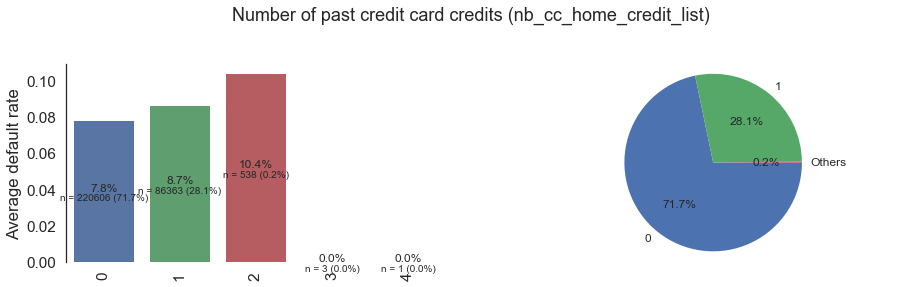

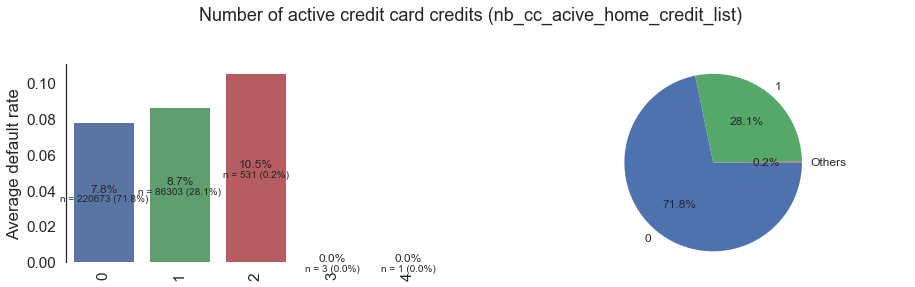

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


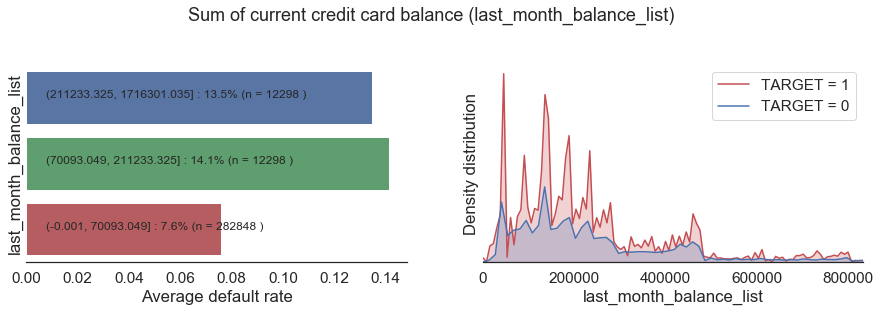

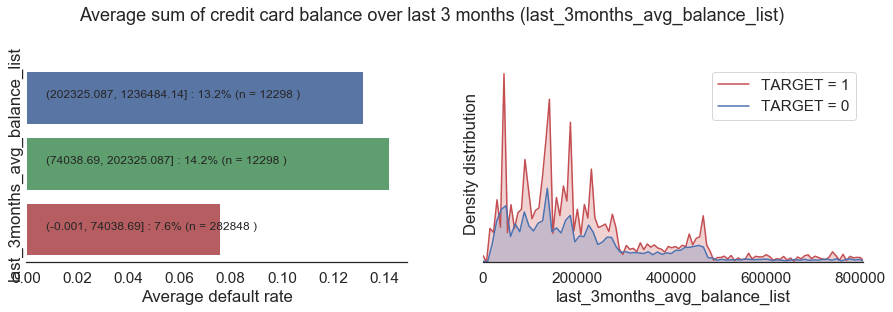

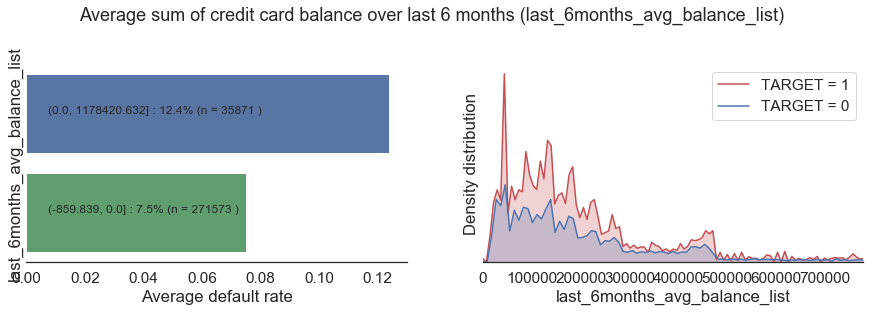

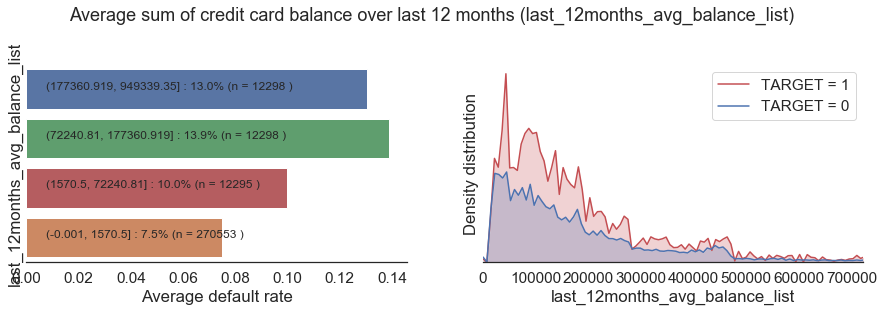

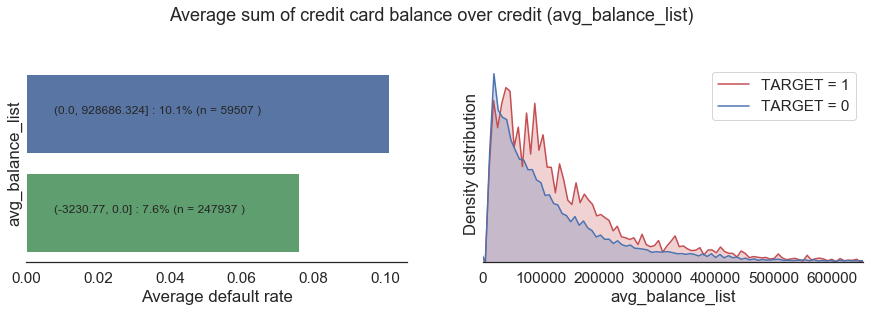

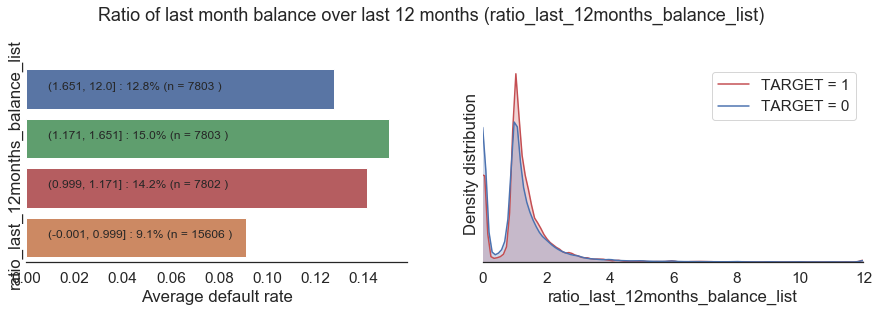

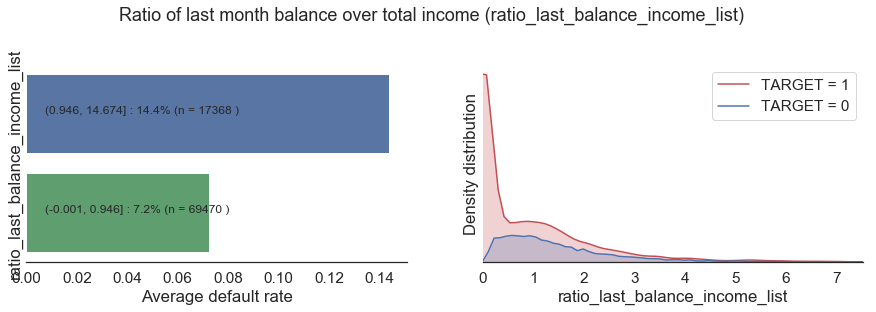

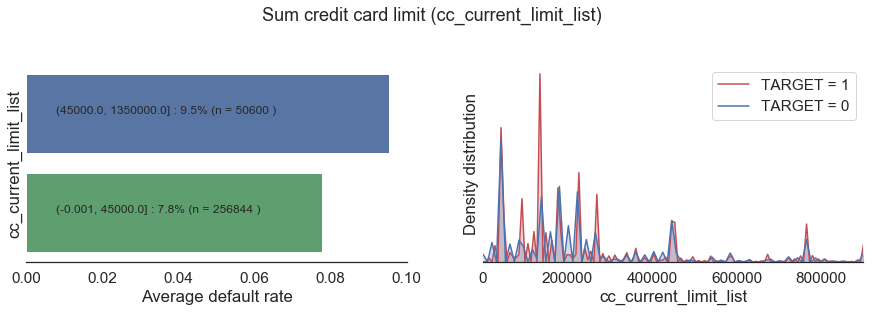

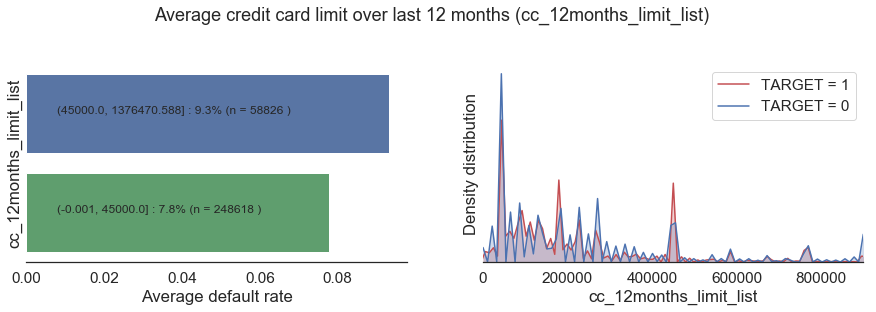

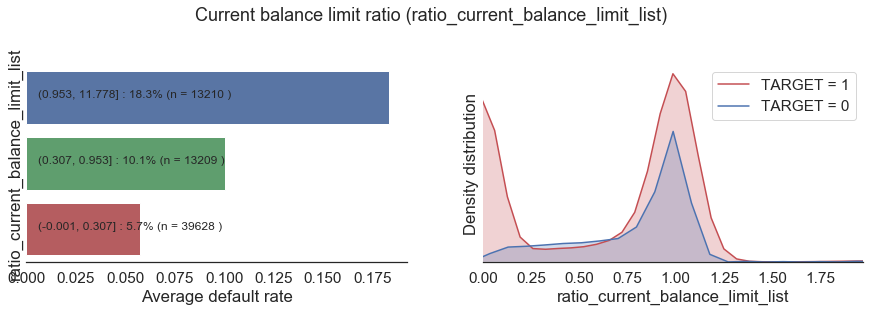

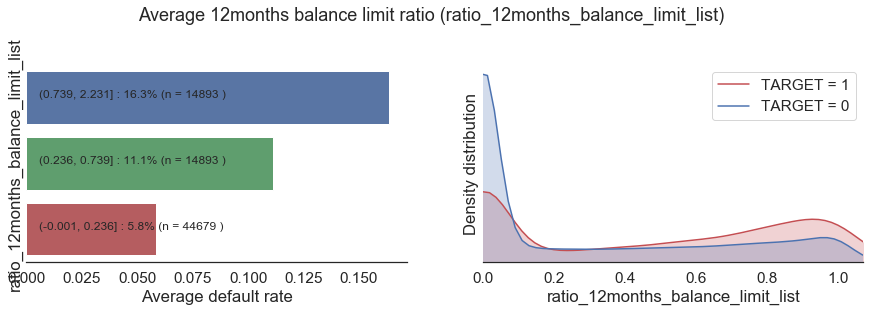

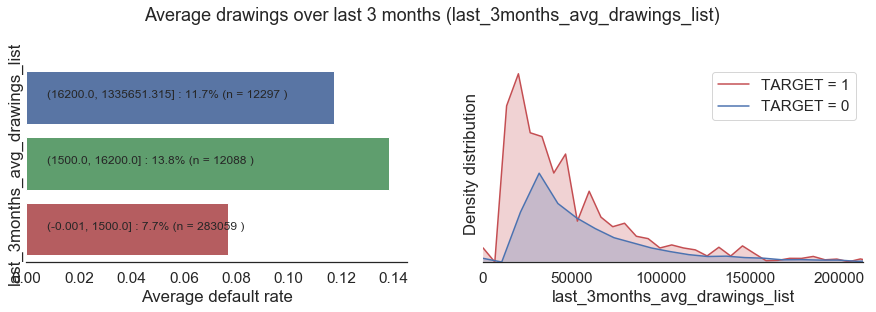

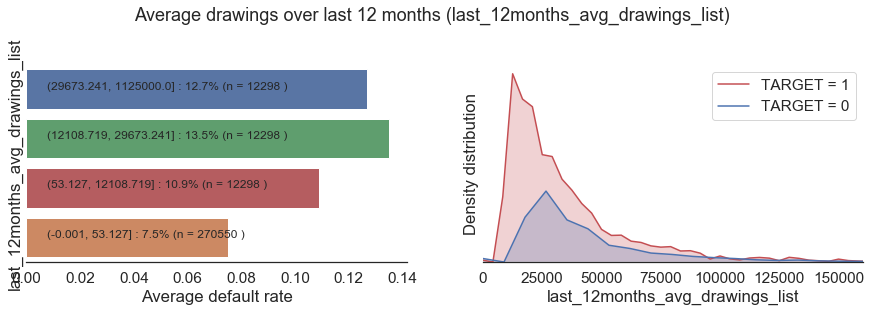

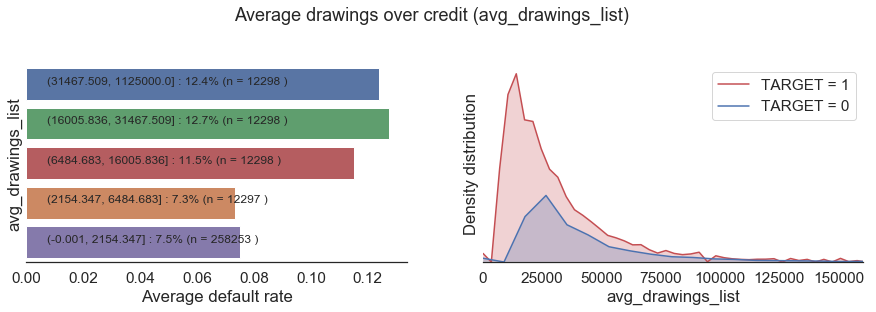

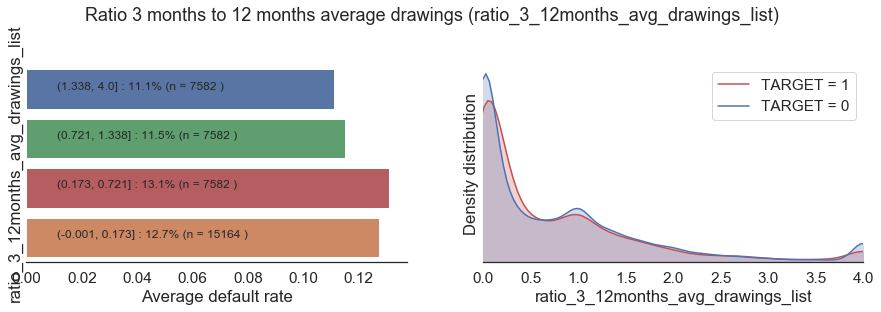

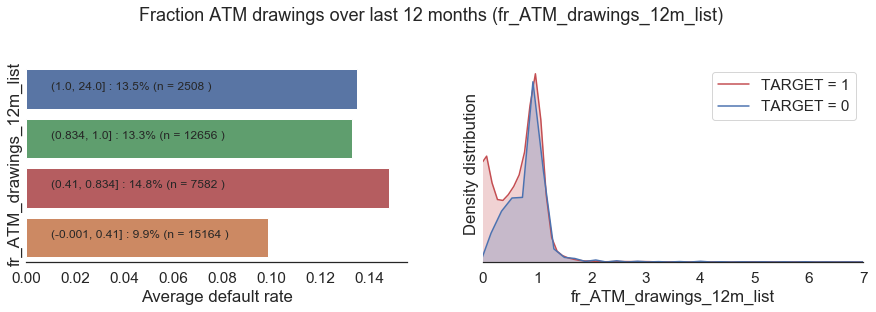

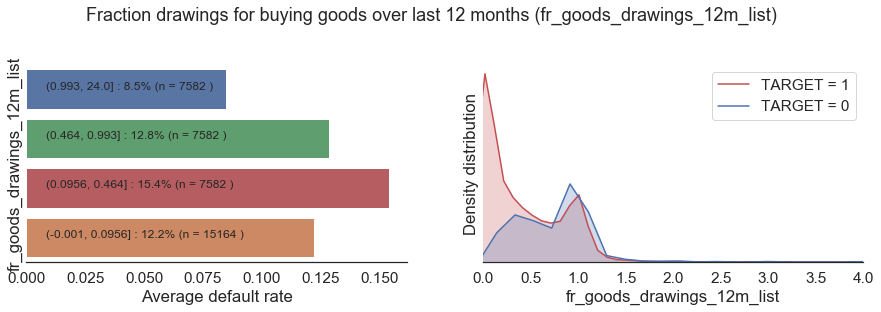

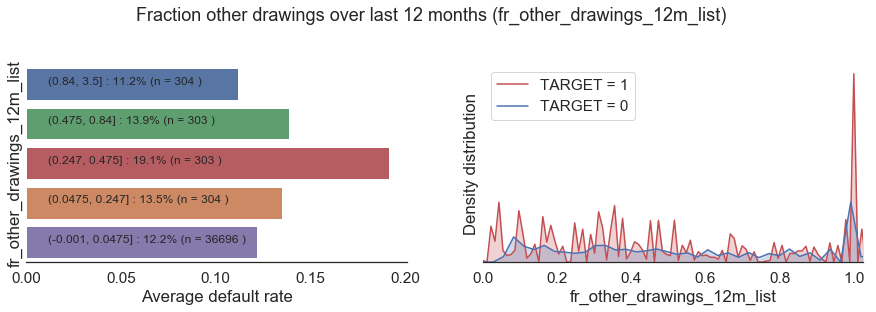

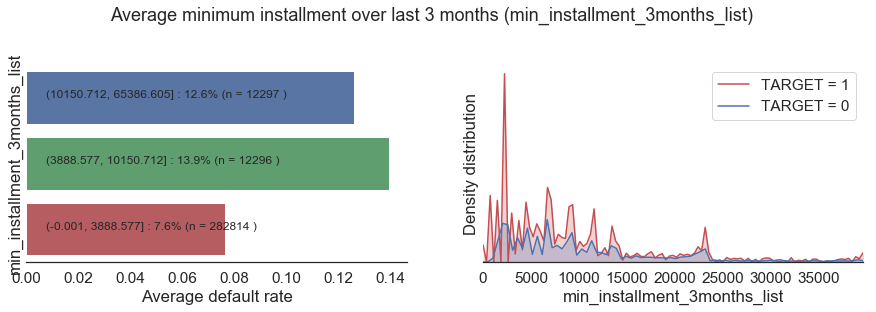

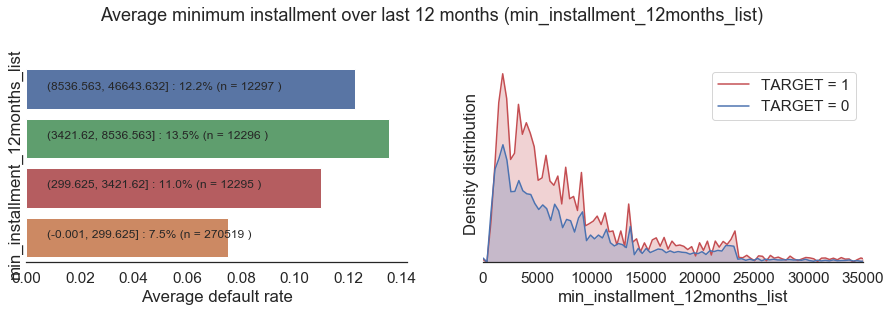

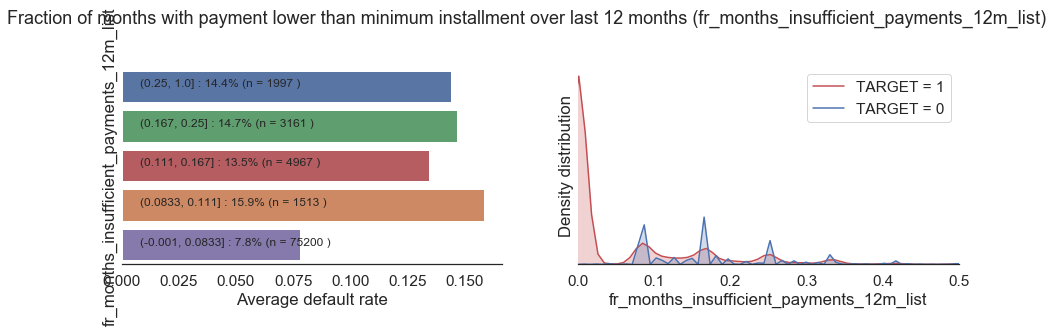

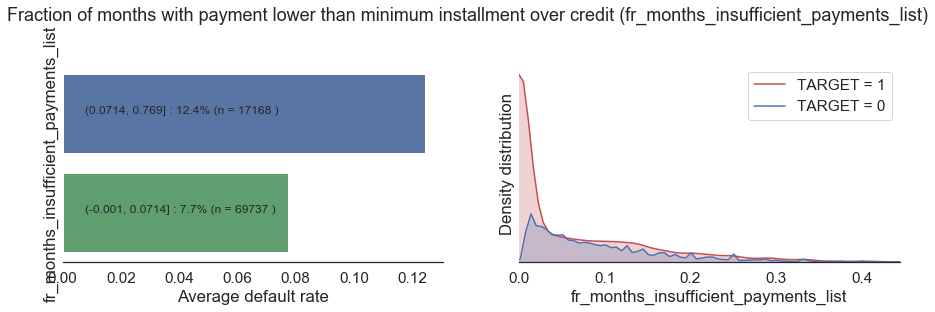

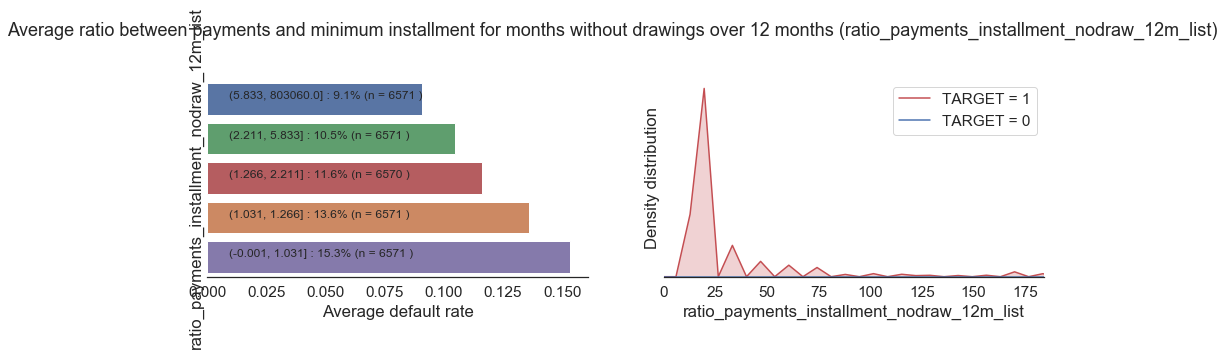

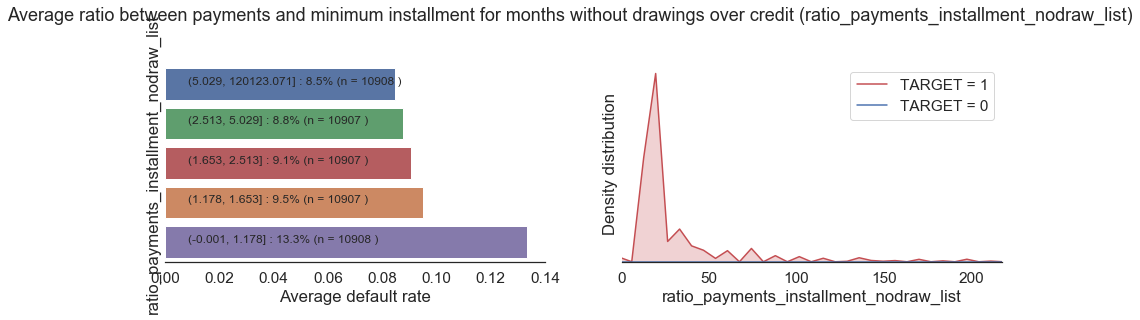

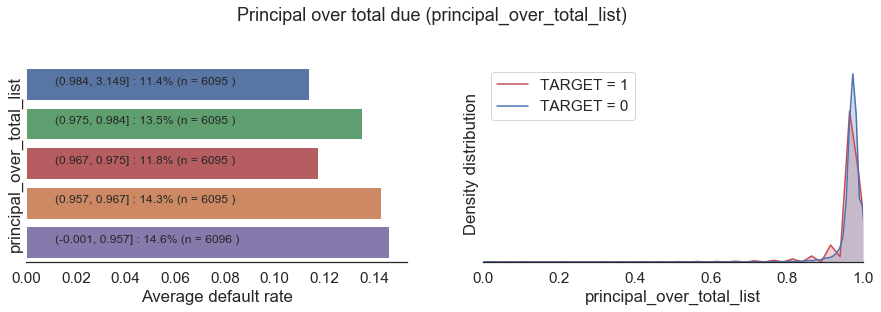

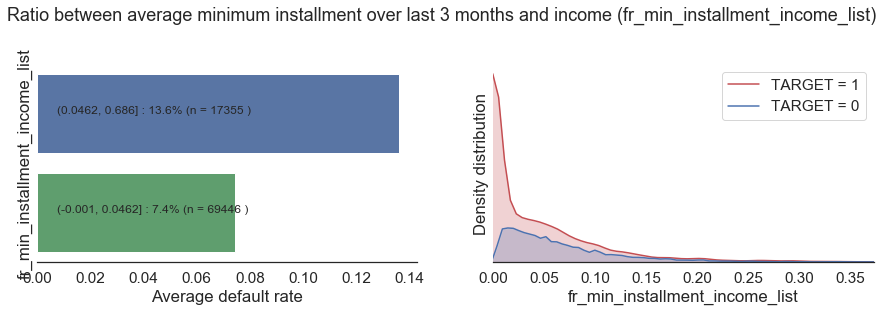

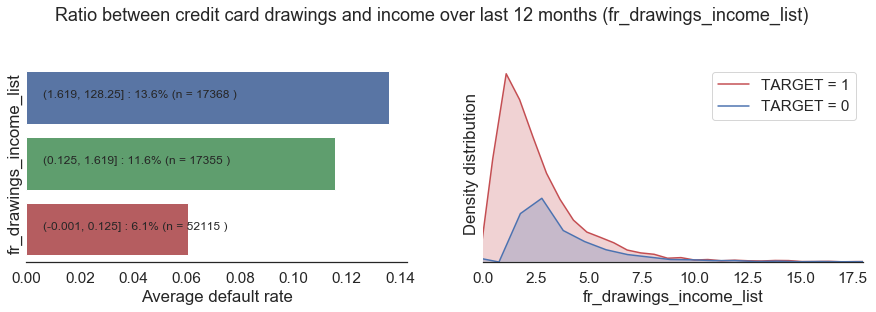

In [11]:
def display_discrete_feature(df, feature, target):
    # Creating figure and axes
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    
    # Print title
    title = homecredit_columns_description[homecredit_columns_description["Row"] == feature]["Description"].tolist()[0] + " (" + feature + ")"
    # If title is too long, reduce font size
    if len(title) <= 100:
        plt.suptitle(title, size = 18)
    else:
        plt.suptitle(title, size = 18*100/len(title))
    
    # Bar plot of mean target as a function of feature value
    df_grouped = df[[feature, target]].groupby([feature]).agg(["mean", "count"])
    # In case of non numerical categorial data, sort by value count
    if type(df_grouped.index[0]) == str:
        df_grouped = df_grouped.sort_values(by = [("TARGET", "count")], ascending = False)
    index = df_grouped.index
    height = df_grouped[("TARGET", "mean")].tolist()
    count = df_grouped[("TARGET", "count")].tolist()
    sns.barplot(index, height, ax = ax1)
    if len(count) >= 5:
        ax1.tick_params(axis='x', rotation=90, labelleft = True)
    ax1.set_xlabel("")
    ax1.set_ylabel('Average default rate')

    sns.despine(bottom=True, ax = ax1)
    # Writing target average and count for each bar plot
    for i, item in enumerate(count):
        ax1.text(x = i , y = height[i]/2, s = str(round(height[i]*100,1))+"%", size = 12, horizontalalignment='center')
        ax1.text(x = i , y = height[i]/2-np.max(height)/20, s = "n = "+str(item)+" ("+str(round(item/len(df)*100, 1))+"%)", size = 10, horizontalalignment='center')

    # Pie chart for the selected feature
    df_value_count = df[feature].value_counts()/len(df[feature].dropna())
    # In case of numerical categorial data, sort by index
    if type(df_value_count.index[0]) != str:
        df_value_count = df_value_count.sort_index()
    # If there are more than 2 categories with low count, then group in Others category
    if len(df_value_count[df_value_count < 2/100]) >= 2:
        df_value_count = df_value_count[df_value_count > 2/100]
        df_value_count["Others"] = 1 - df_value_count.sum()
    df_value_count.plot(kind="pie", autopct="%1.1f%%", ax = ax2, startangle = 0
                        , counterclock = False, textprops=dict(fontsize=12), 
                       wedgeprops = {'linewidth': 0} )
    ax2.set_ylabel("")
    ax2.axis('equal')

    plt.show()
    
    
def display_continuous_feature(df, feature, target, bins):
    # Creating figure and axes
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
   
    # Print title
    title = homecredit_columns_description[homecredit_columns_description["Row"] == feature]["Description"].tolist()[0]
    # If title is too long, reduce font size
    if len(title) <= 100:
        plt.suptitle(title+ " (" + feature + ")", size = 18)
    else:
        plt.suptitle(title+ " (" + feature + ")", size = 18*100/len(title))

    # Barplot of mean target as a function of feature value
    feature_bins = pd.qcut(df[feature], bins, duplicates = "drop")
    while len(feature_bins.unique()) <= 2:
        bins = bins * 5
        feature_bins = pd.qcut(df[feature], bins, duplicates = "drop")
    df2 = df.pivot_table(target, feature_bins).reset_index().sort_values(by = [feature], ascending = False).reset_index(drop = True)
    df3 = df.pivot_table(target, feature_bins, aggfunc='count').reset_index().sort_values(by = [feature], ascending = False).reset_index(drop = True)
    sns.barplot(y=feature, x=target, orient = "h", data = df2, ax = ax1, order = df2[feature])
    height = df2[target]
    count =  df3[target]
    ax1.set_ylabel(feature)
    ax1.set_xlabel('Average default rate')
    ax1.set_yticks([])
    for i, item in enumerate(count):
        ax1.text(y = i , x = min(height)/10, s = str(df2[feature][i]) + " : "+ str(round(height[i]*100,1))+"%" +" (n = "+str(item)+" )", size = 12, horizontalalignment='left')
    sns.despine(left=True, ax = ax1)

    # Kernel Density Estimate of the feature for both target values
    sns.kdeplot(df[df["TARGET"] == 1][feature], shade=True, color = pal.as_hex()[2], ax = ax2, label="TARGET = 1")
    sns.kdeplot(df[df["TARGET"] == 0][feature], shade=True, color = pal.as_hex()[0], ax = ax2, label="TARGET = 0")
    ax2.set_xlabel(feature)
    ax2.set_ylabel('Density distribution')
    ax2.set_yticks([])
    min_x = min(df[df["TARGET"] == 1][feature].quantile(.001), df[df["TARGET"] == 0][feature].quantile(.001))
    max_x = min(df[df["TARGET"] == 1][feature].quantile(.999), df[df["TARGET"] == 0][feature].quantile(.999))
    ax2.set_xlim([min_x, max_x])
    sns.despine(left=True, ax = ax2)
    plt.show()

for feature in discrete_features:
    display_discrete_feature(application[application["train"] == 1], feature, "TARGET")

for index, feature in enumerate(continuous_features):
    display_continuous_feature(application[application["train"] == 1], feature, "TARGET", 5)